In [147]:
# Structure
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import random

# Text Analysis
from wordcloud import WordCloud
from collections import Counter

# For Hanguel
plt.rc('font', family='Malgun Gothic')
# Present as entire num
pd.set_option('display.float_format', '{:.2f}'.format)

In [148]:
df.columns

Index(['views', 'likes', 'ads_yn', 'duration_seconds', 'subscribers',
       'totalViews', 'ch_avg_views', 'genre_weight', 'date_from_recent',
       'date_from_recent_week', 'cluster', 'video_url', 'title', 'channel_id',
       'genre', 'shorts_yn', 'views_per_sub'],
      dtype='object')

# Purpose of EDA
    -  어떻게 평가해야 할까?
    - 'views', 'likes' 이 높은 (반응이 좋은)
    - 'subscribers', 'totalViews' 이 낮은 (채널이 저평가된)
    -  'date_from_recent'이 낮은 (올린지 얼마 안 된 영상)

## Cluster Description
- Cluster 0: Videos are on the shorter end of the spectrum, even within their genre, with no ads.
- Cluster 1: videos with very good responses + videos that are long in length within the genre and have ads.
- Cluster 2: videos with good responses, but not as much recognition, and a lot of ads.
- Cluster 3: videos that have just been uploaded, not much response, and short videos without ads.
- Cluster 4: Videos that are not well-received compared to their popularity.

In [149]:
# Load the Data
df = pd.read_csv('df_cluster_05_01_pca_num_5.csv')
df_pca = pd.read_csv('pca_df_cluster_05_01_pca_num_5.csv')
# cluster 열 대치
df['cluster'] = df_pca['cluster']+1
df = df.iloc[:,1:]
# Load the raw data
raw_df = pd.read_csv('data_sample.csv')

# 장르 별 파악을 위해 genre 열 추가
df = pd.merge(df, raw_df[['video_url', 'genre']], on='video_url')
df.columns

Index(['views', 'likes', 'ads_yn', 'duration_seconds', 'subscribers',
       'totalViews', 'ch_avg_views', 'genre_weight', 'date_from_recent',
       'date_from_recent_week', 'cluster', 'video_url', 'title', 'channel_id',
       'genre'],
      dtype='object')

In [194]:
df.groupby('cluster')['date_from_recent_week'].mean()

cluster
1   19.03
3   13.25
4    5.67
5    8.02
Name: date_from_recent_week, dtype: float64

In [152]:
# Shorts 여부 컬럼 추가
df['shorts_yn'] = df['duration_seconds'] < 60
df['shorts_yn'] = df['shorts_yn'].astype('int')

# 구독자 대비 조회수 피쳐 추가
df['views_per_sub'] = df['views'] / df['subscribers'].replace(0, np.nan)

# Cluster 별로 그룹화된 객체 생성
df_grouped = df.groupby('cluster')

---

# EDA

### 동일한 채널의 영상이 몇 개 정도 있는지


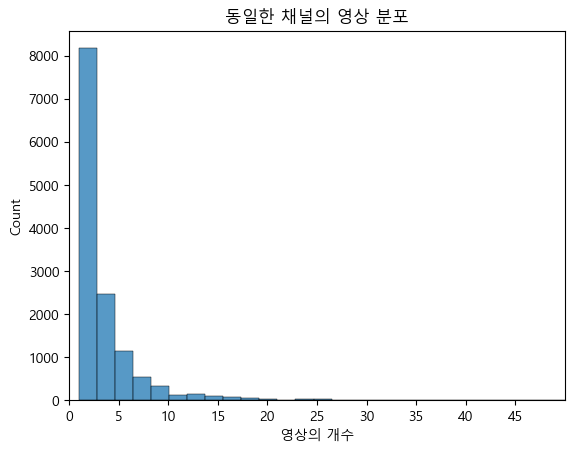

In [154]:
# histogram
channel_count = df.groupby('channel_id').size()
plt.title('동일한 채널의 영상 분포')
sns.histplot(channel_count, bins=100)
plt.xlabel('영상의 개수')
plt.ylabel('Count')
plt.xlim(0,50)
plt.xticks(range(0,50, 5))
plt.show()

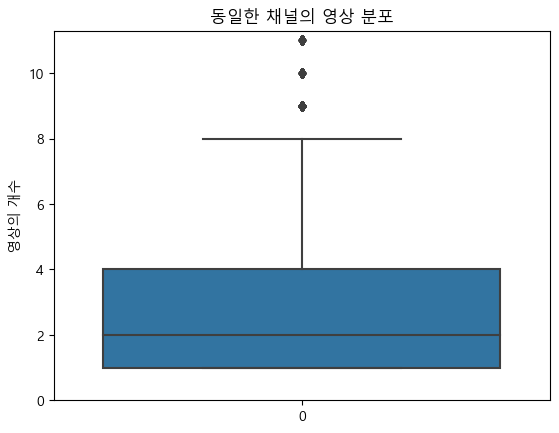

In [155]:
plt.title('동일한 채널의 영상 분포')
sns.boxplot(channel_count)
plt.ylim(0,channel_count.quantile(.95))
plt.ylabel('영상의 개수')
plt.show()

## 클러스터 별 EDA

## 클러스터 별 영상의 개수

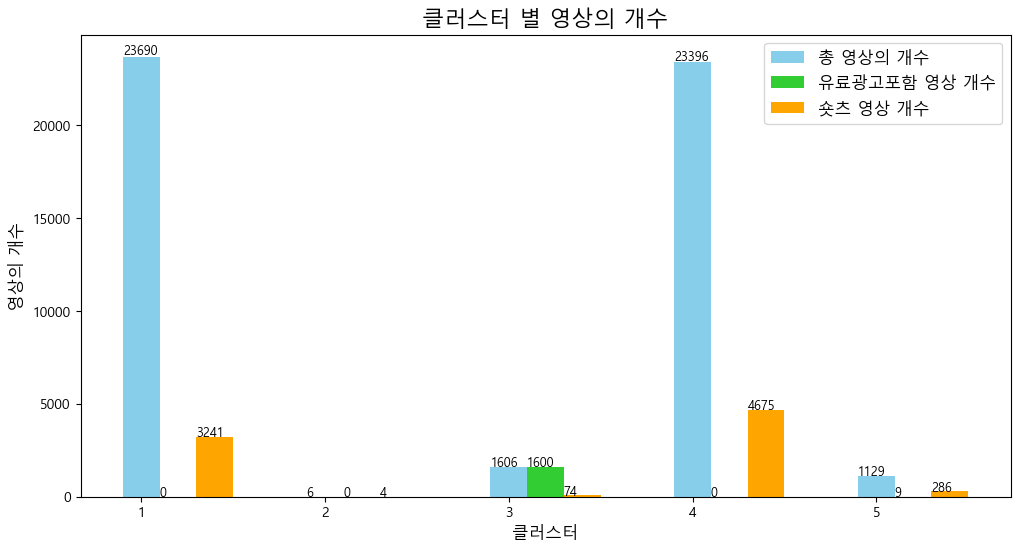

,총 영상 개수,유료광고 영상 개수,숏츠 영상 개수
cluster,,,
1,23690,0,3241
2,6,0,4
3,1606,1600,74
4,23396,0,4675
5,1129,9,286


In [156]:
# 전체 영상, 광고 영상, 숏츠의 개수
video_url_counts = df_grouped['video_url'].count()
ads_yn_counts = df_grouped['ads_yn'].apply(lambda x: x[x == 1].count())
shorts_counts = df_grouped['shorts_yn'].apply(lambda x: x[x == 1].count())

# 막대 그래프

fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.2

bar1 = ax.bar(video_url_counts.index, video_url_counts, bar_width, color='skyblue', label='총 영상의 개수')
bar2 = ax.bar(ads_yn_counts.index + bar_width, ads_yn_counts, bar_width, color='limegreen', label='유료광고포함 영상 개수')
bar3 = ax.bar(shorts_counts.index + 2*bar_width, shorts_counts, bar_width, color='orange', label='숏츠 영상 개수')

plt.title("클러스터 별 영상의 개수", fontsize=16)
plt.xlabel('클러스터', fontsize=12)
plt.ylabel('영상의 개수', fontsize=12)

# 수치 추가
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.005), fontsize=9)

ax.legend(fontsize=12)
plt.show()
# 데이터프레임으로 표로 
num_df = pd.DataFrame({"총 영상 개수": df_grouped['video_url'].count(),
                      "유료광고 영상 개수": ads_yn_counts,
                      "숏츠 영상 개수": shorts_counts})
num_df

In [157]:
# 2번 클러스터만 분리
df = df[df['cluster']!=2]
# Cluster 2을 제외한 그룹화 객체 생성
df_grouped = df.groupby('cluster')

# Numerical Features


### 수치형 변수의 분포

views


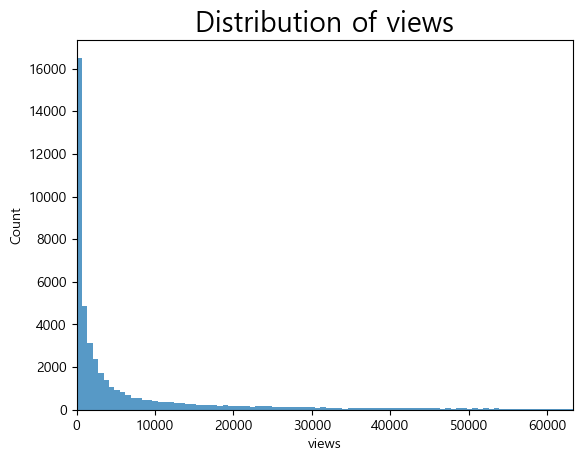

likes


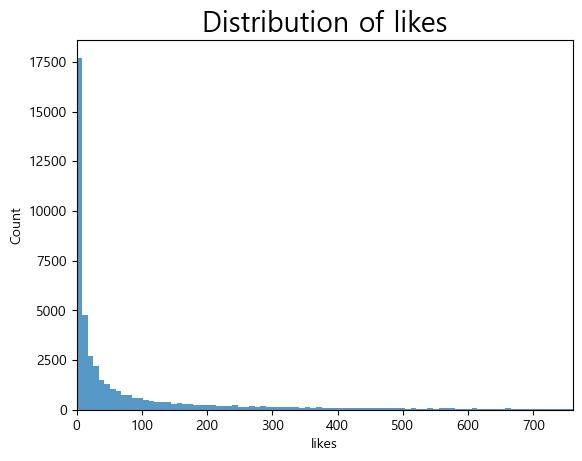

duration_seconds


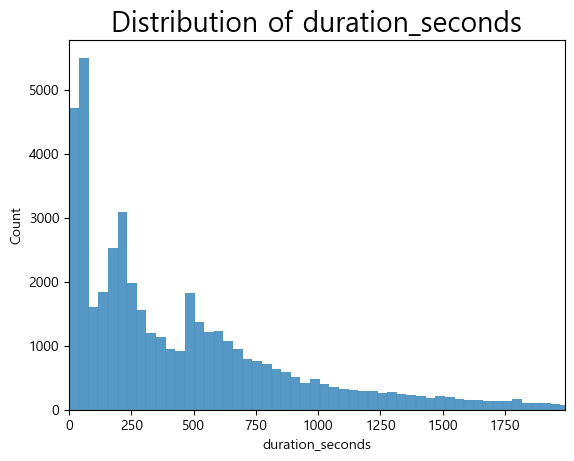

subscribers


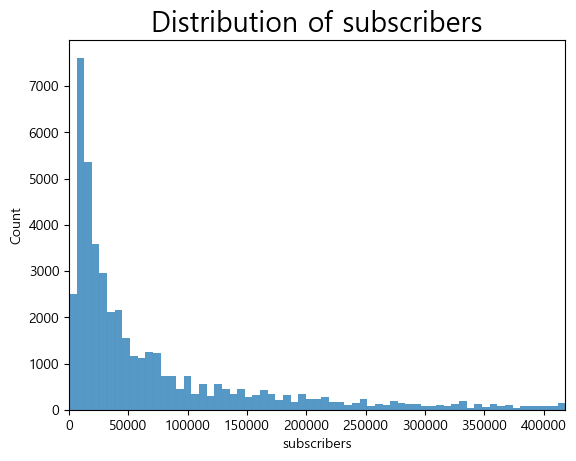

totalViews


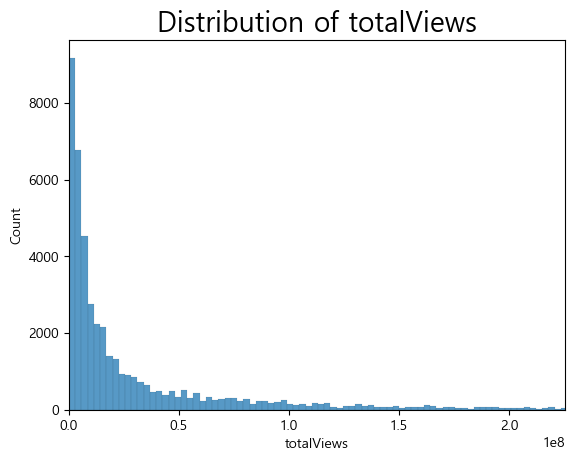

ch_avg_views


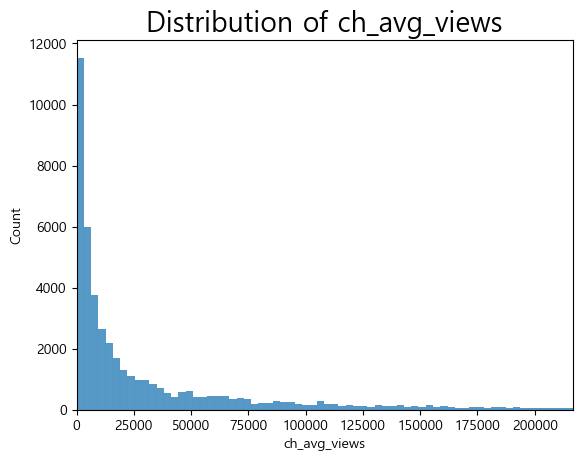

In [175]:
# Figure와 Subplots 생성
for i, feature in enumerate(n_features):
    print(feature)
    sns.histplot(df[feature])
    plt.title(f"Distribution of {feature}", fontsize=20)
    x_max = df[feature].quantile(0.9)
    plt.xlim(0,x_max)
    plt.show()

## Mean 시각화

In [158]:
# 수치 변수
n_features=['views', 'likes', 'duration_seconds', 'subscribers','totalViews', 'ch_avg_views']
mean_df = df_grouped[n_features].mean()
mean_df

,views,likes,duration_seconds,subscribers,totalViews,ch_avg_views
cluster,,,,,,
1,34742.26,349.48,1459.54,125347.79,63267804.36,66525.18
3,59464.36,572.81,2057.13,308533.23,181840845.49,130505.36
4,24333.59,335.12,783.04,140063.48,71613815.91,76665.89
5,409896.03,7443.43,476.23,5670502.28,1806349446.43,1082739.16


In [159]:
def barplot_mean(mean_df, color):
    # Figure와 Subplots 생성
    fig, axs = plt.subplots(2, 3, figsize=(20, 18))
    plt.suptitle('수치형 변수의 평균값', fontsize=24)
    # numeric value에 대한 boxplot
    for i, feature in enumerate(n_features):
        row = i // 3
        col = i % 3
        sns.barplot(x=mean_df.index, y=feature, data=mean_df, ax=axs[row, col], palette=color)
        axs[row, col].set_title(f"{feature}", fontsize=20)
        axs[row, col].set_xlabel('Cluster', fontsize=16)
        axs[row, col].set_ylabel(feature, fontsize=16)
    
    # 각 서브플롯 간의 간격 조정
    plt.tight_layout(pad=3)
    # 그래프 보여주기
    plt.show()
    return

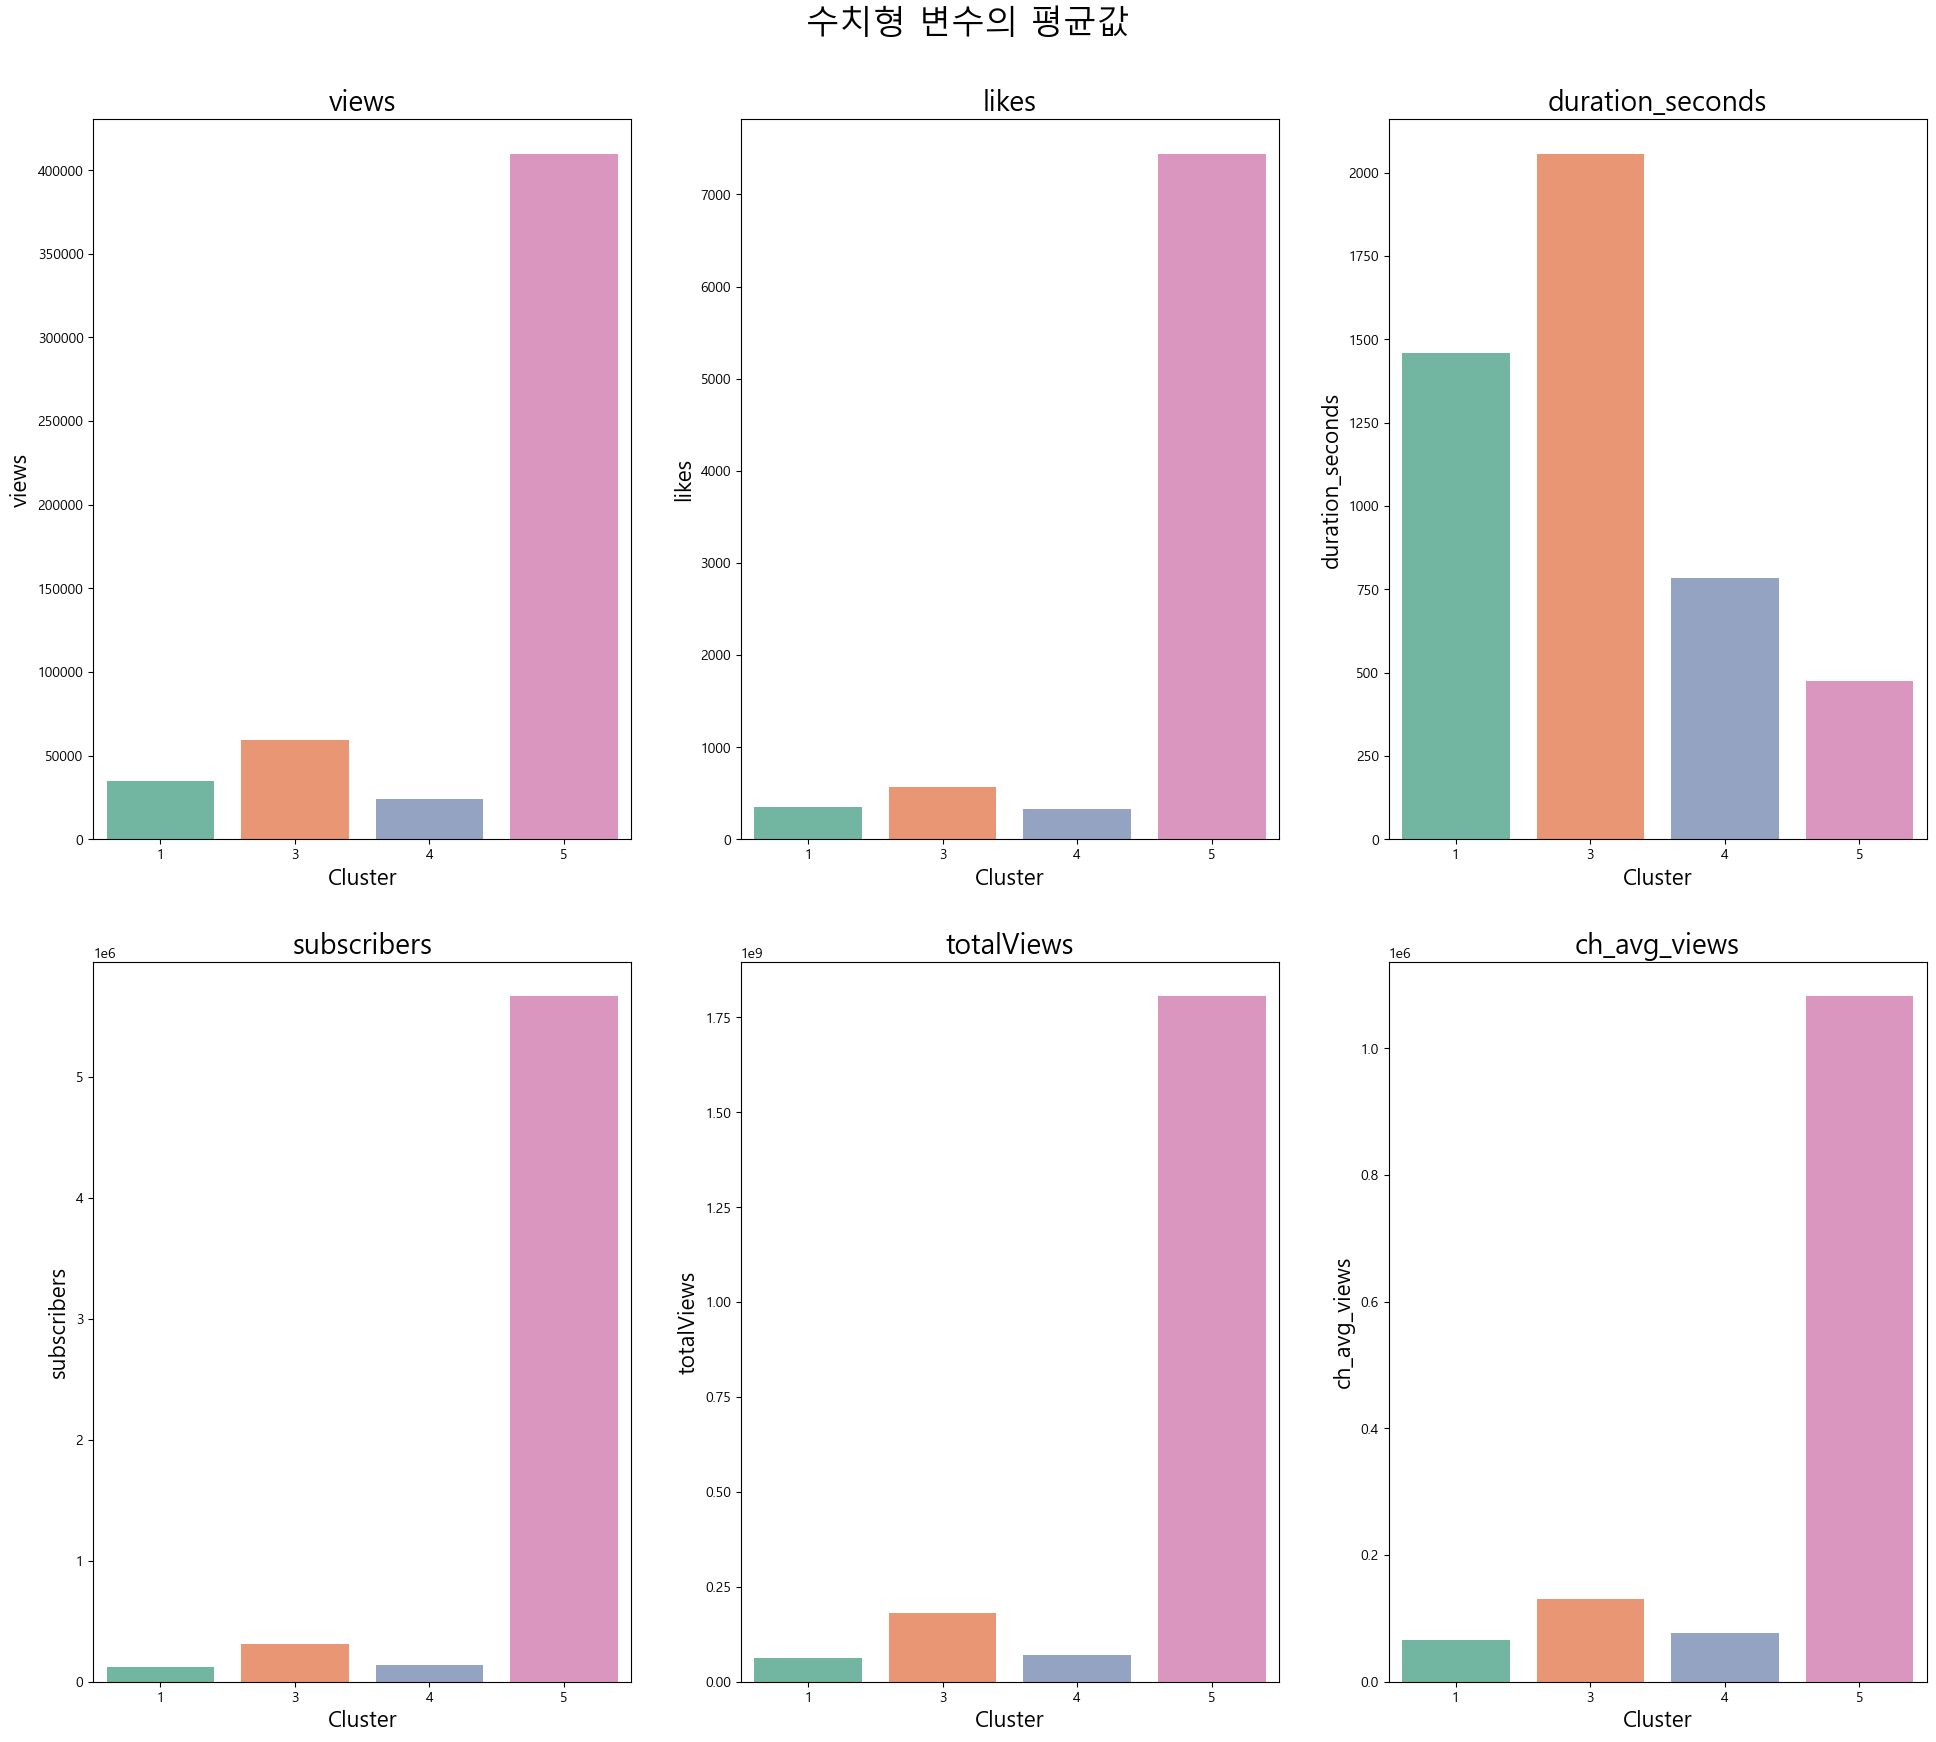

In [161]:
barplot_mean(mean_df, 'Set2')

## Boxplot

In [162]:
def boxplot_feature(df, color='Set1'):
    # Figure와 Subplots 생성
    fig, axs = plt.subplots(2, 3, figsize=(16, 12))
    plt.suptitle('수치형 변수의 박스플롯', fontsize=24)
    # numeric value에 대한 boxplot
    for i, var in enumerate(n_features):
        row = i // 3
        col = i % 3
        sns.boxplot(x='cluster', y=var, data=df, ax=axs[row, col], palette=color)
        axs[row, col].set_title(f"{var}", fontsize=20)
        axs[row, col].set_xlabel('Cluster', fontsize=16)
        axs[row, col].set_ylabel(var, fontsize=16)
        y_max = df[var].quantile(0.95)  # 0.95 quantile used as an example
        axs[row, col].set_ylim(0, y_max)
    
    # 각 서브플롯 간의 간격 조정
    plt.tight_layout(pad=3)
    
    # 그래프 보여주기
    plt.show()
    return

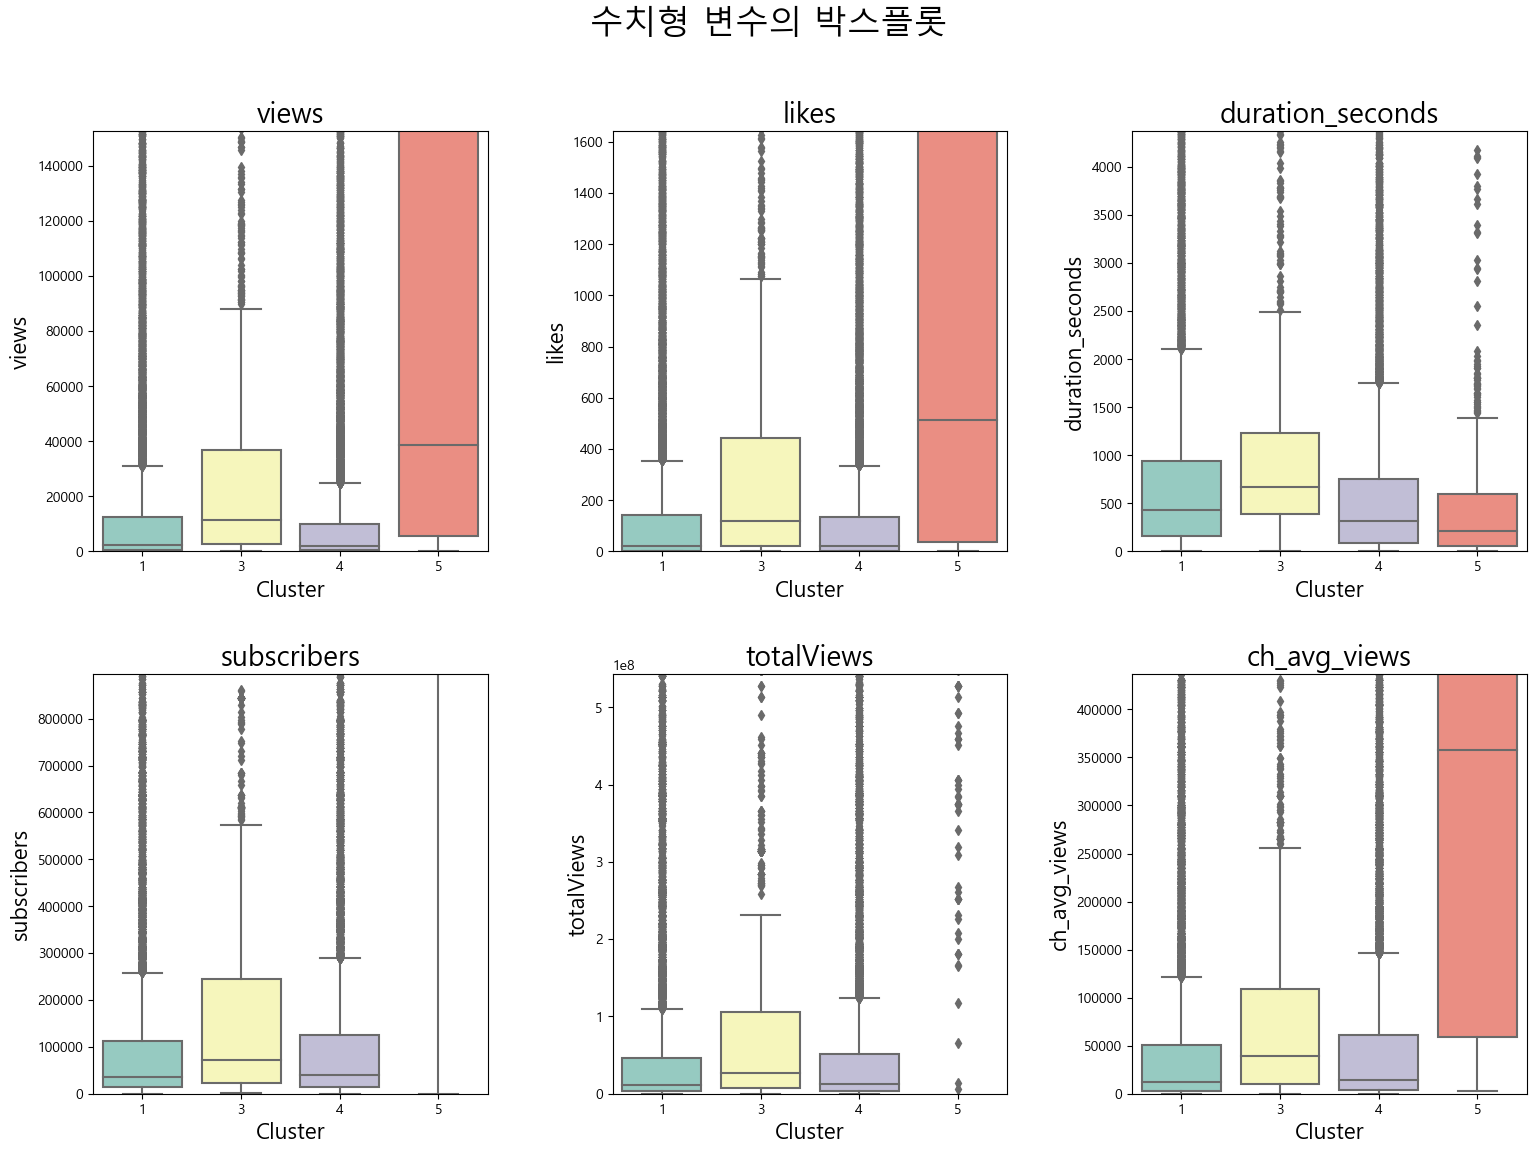

In [163]:
boxplot_feature(df, color='Set3')

## 이상치 제거
    - Replace outlier with NA
    - Q1-IQR*1.5 미만, Q3+IQR*1.5 초과 값 제거

In [164]:
def handle_outlier(df, lim=1.5):
    # iterate over all unique clusters
    for cluster in df['cluster'].unique():
        
        exout_df = df.copy()

        # iterate over all numeric features
        for feature in n_features:
            # 각 피쳐의 Qunitile 값
    
            Q1 = exout_df[feature].quantile(0.25)
            Q3 = exout_df[feature].quantile(0.75)
            IQR = Q3 - Q1
    
            # define outliers
            outlier_condition = (exout_df[feature] < (Q1 - lim * IQR)) | (exout_df[feature] > (Q3 + lim * IQR))
    
            # replace outliers with NaN
            exout_df.loc[outlier_condition, feature] = np.nan
            
    return exout_df

In [166]:
exout_df = handle_outlier(df)

### 클러스터 별 아웃라이어 비교

In [33]:
def get_outlier(df_grouped, n_group, feature, lim=1.5):
    feature = feature
    tmp_df = df_grouped.get_group(n_group)
    
    # Outlier
    Q1 = tmp_df[feature].quantile(0.25)
    Q3 = tmp_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # feature 기준으로 행을 제거
    outlier_condition = (tmp_df[feature] < (Q1 - lim * IQR)) | (tmp_df[feature] > (Q3 + lim * IQR))
    no_outlier_condition = outlier_condition.apply(lambda x: not x)
    
    df_out = tmp_df.loc[outlier_condition]
    df_noout = tmp_df.loc[no_outlier_condition]
    print(f'그룹{n_group} 이상치 행의 개수  - {feature} 값 기준')
    print(f'이상치: {len(df_out)}개 \n정상치: {len(df_noout)}개 \n이상치 비율: {round(len(df_out)/len(df_noout),2)}')
    print('')
    return df_out, df_noout

In [88]:
for c in range(df['cluster'].nunique()):
    print('--------------------------------')
#     get_outlier(df_grouped, c, feature='subscribers')
#     get_outlier(df_grouped, c, feature='views')
    get_outlier(df_grouped, c, feature='eval')

--------------------------------
그룹0 이상치 행의 개수  - eval 값 기준
이상치: 2734개 
정상치: 20956개 
이상치 비율: 0.13

--------------------------------
그룹1 이상치 행의 개수  - eval 값 기준
이상치: 0개 
정상치: 6개 
이상치 비율: 0.0

--------------------------------
그룹2 이상치 행의 개수  - eval 값 기준
이상치: 143개 
정상치: 1463개 
이상치 비율: 0.1

--------------------------------
그룹3 이상치 행의 개수  - eval 값 기준
이상치: 2591개 
정상치: 20805개 
이상치 비율: 0.12

--------------------------------
그룹4 이상치 행의 개수  - eval 값 기준
이상치: 168개 
정상치: 961개 
이상치 비율: 0.17



## 이상치를 제거 후 Barplot과 Boxplot 확인

In [167]:
# 이상치 제거한 그룹화 객체
exout_df = handle_outlier(df)
grouped_exout = exout_df.groupby('cluster')
mean_exout_df = grouped_exout[n_features].mean()
mean_exout_df

,views,likes,duration_seconds,subscribers,totalViews,ch_avg_views
cluster,,,,,,
1,4353.38,52.03,454.96,57242.37,21424474.28,22789.07
3,8601.53,93.07,657.73,73605.58,28271660.81,39305.06
4,4119.97,50.45,428.74,60263.22,21864853.13,24952.80
5,8119.81,83.55,355.43,128733.64,50598748.50,50848.02


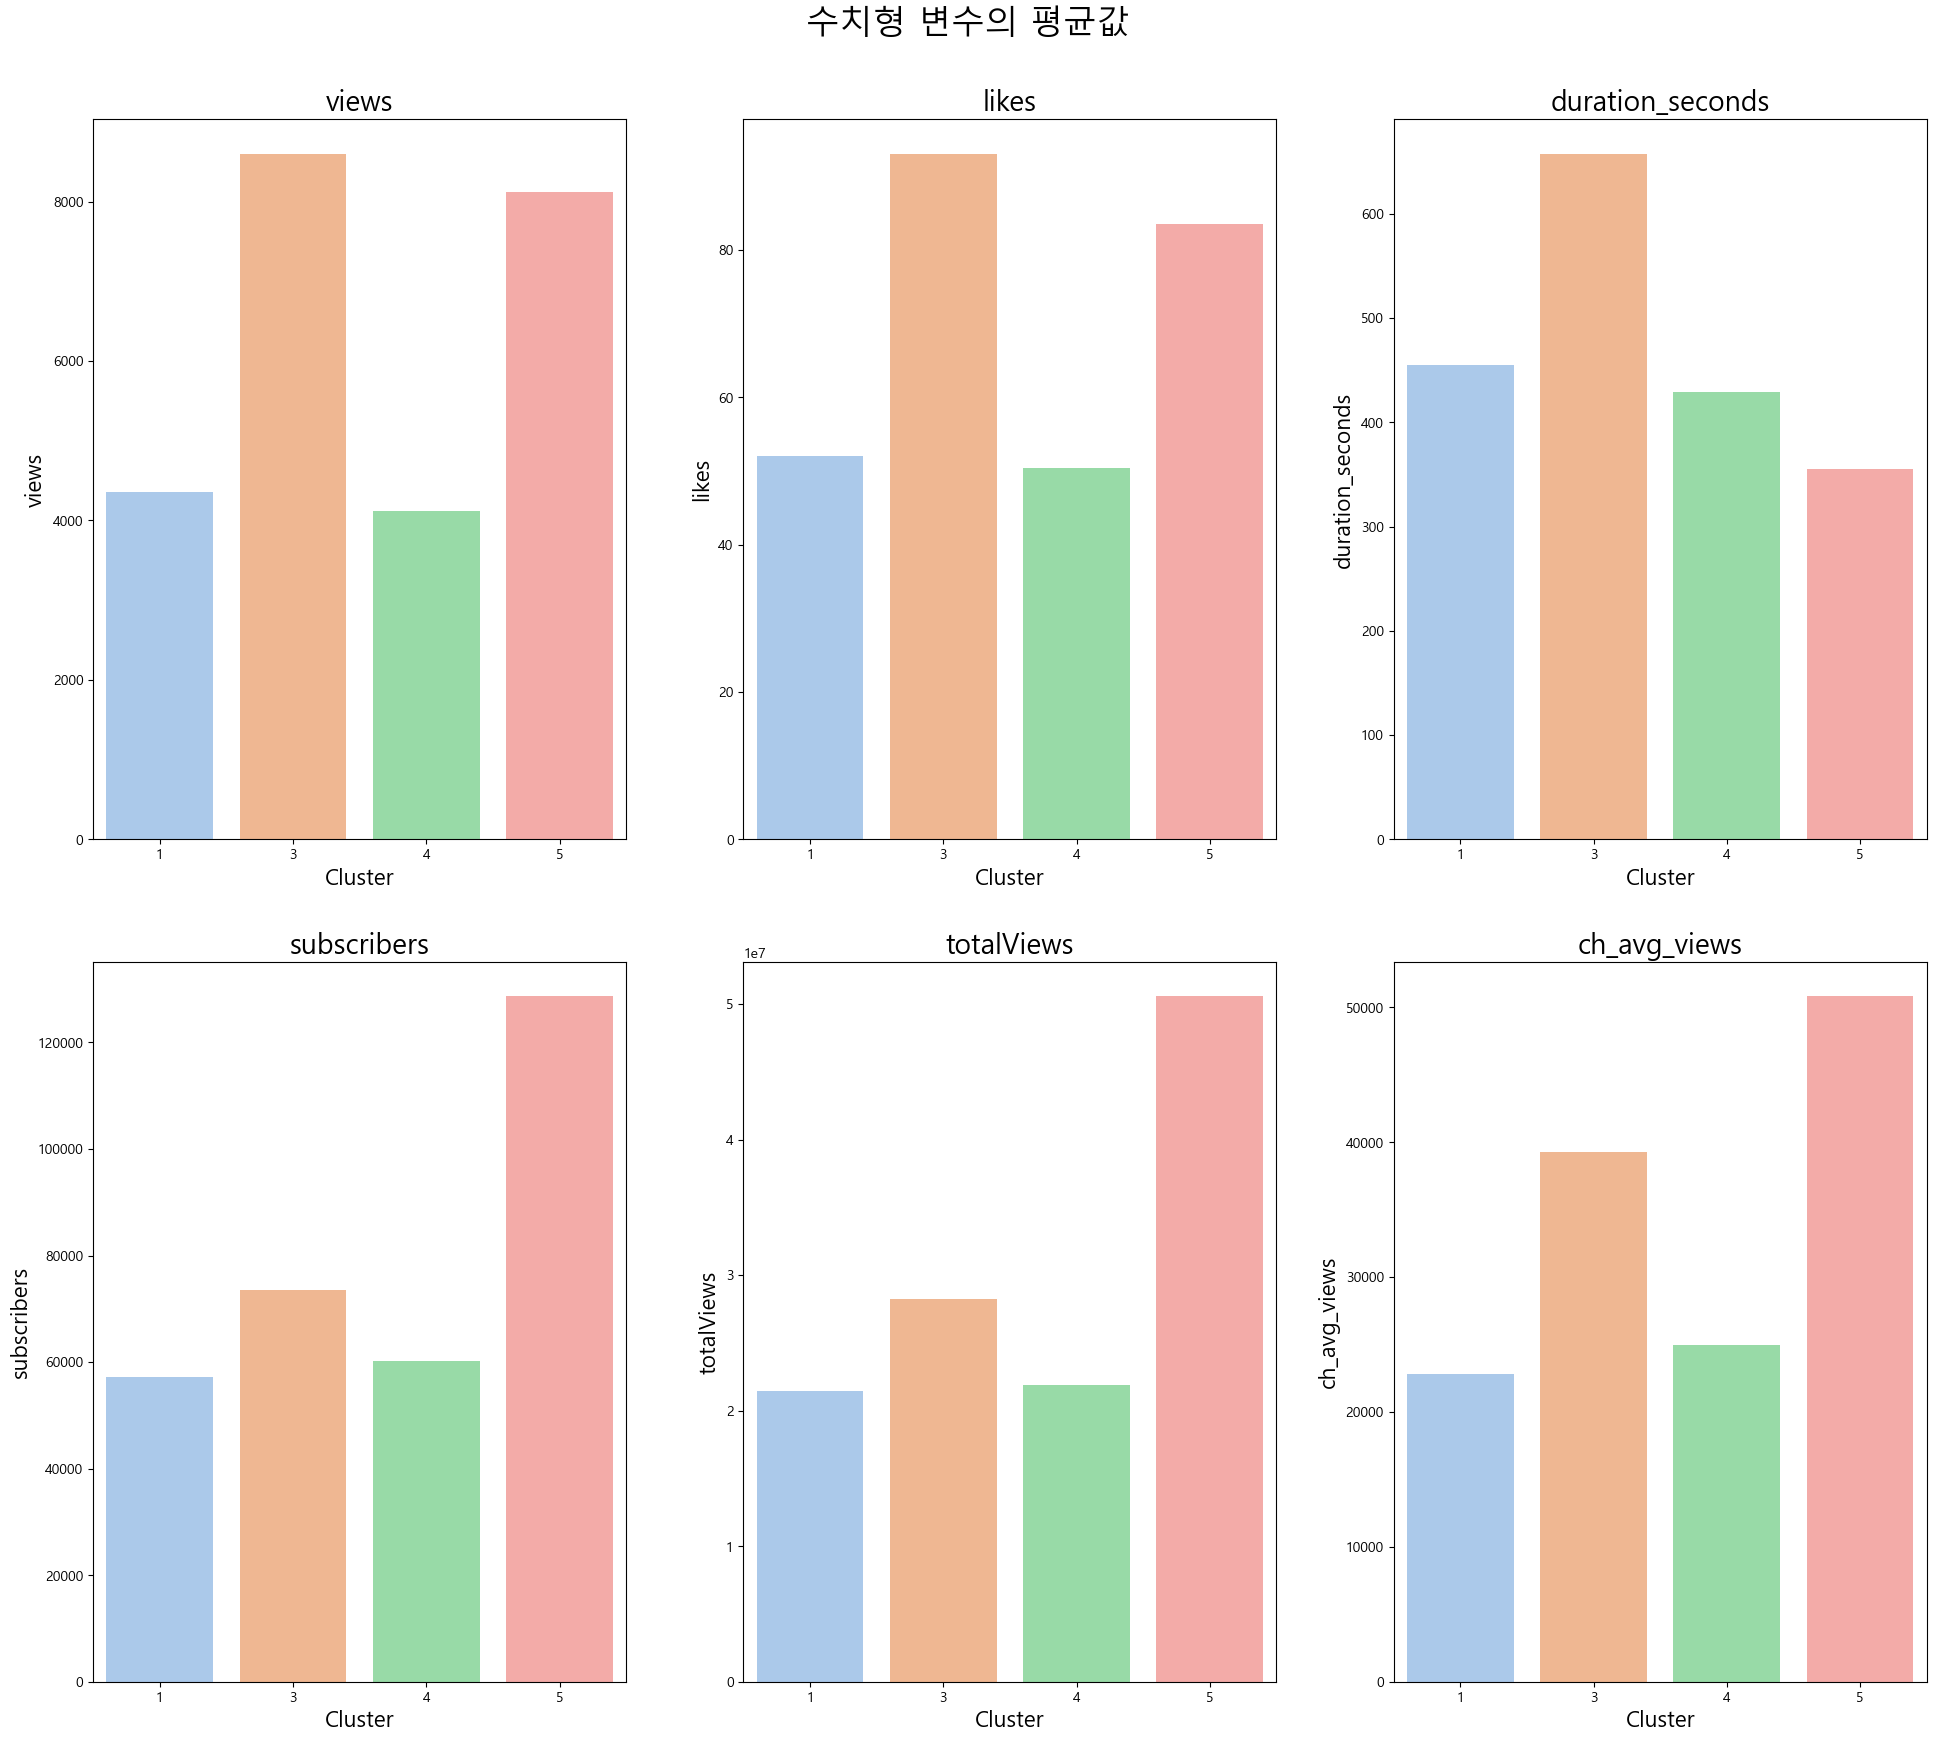

In [168]:
barplot_mean(mean_exout_df, 'pastel')

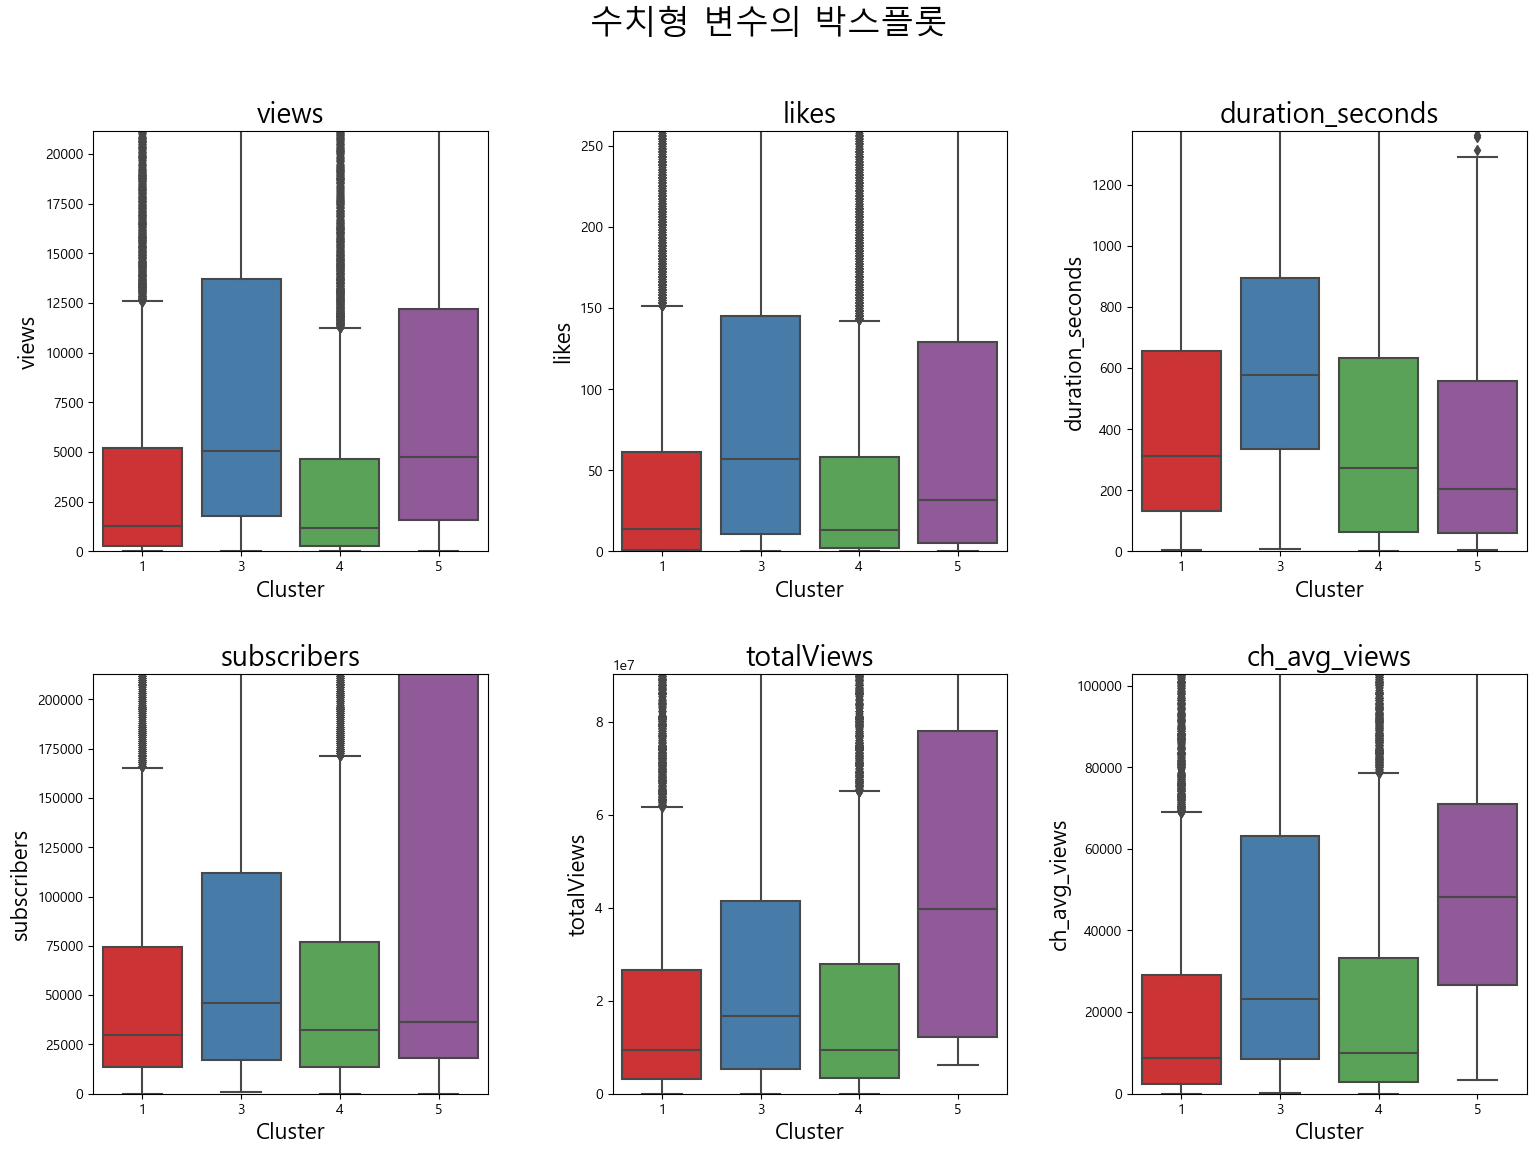

In [169]:
boxplot_feature(exout_df)

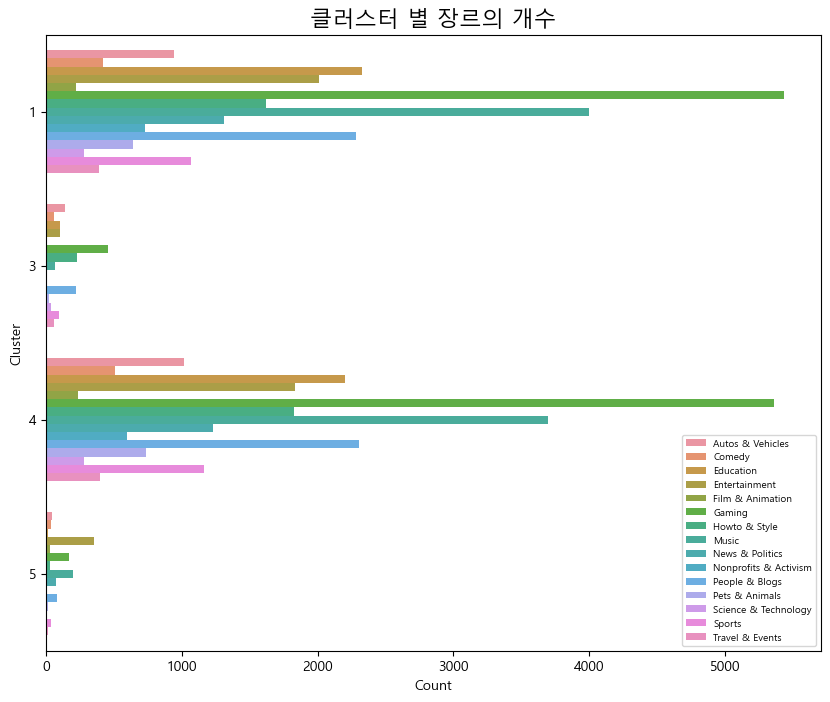

In [177]:
# 클러스터 별로 장르 개수 파악
c_genre_grouped = df.groupby(['cluster', 'genre']).size()
c_genre_grouped = pd.DataFrame(c_genre_grouped).rename(columns={0:'count'})
c_genre_grouped = c_genre_grouped.reset_index()
c_genre_grouped

plt.figure(figsize=(10, 8))
sns.barplot(x="count", y="cluster", hue="genre", data=c_genre_grouped, orient='h')
plt.title('클러스터 별 장르의 개수', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Cluster')
plt.legend(fontsize=7, loc='lower right')
plt.show()

### 클러스터 별 채널의 개수

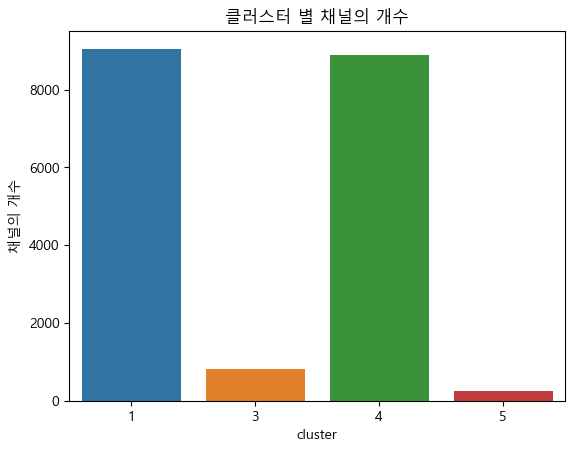

cluster
1    9053
3     821
4    8903
5     247
Name: channel_id, dtype: int64


In [178]:
# 'channel_id' 별로 클러스터 수를 계산
tmp_df = df.groupby('cluster').nunique()['channel_id']

plt.title("클러스터 별 채널의 개수")
# 클러스터 수별로 채널 수를 집계
sns.barplot(x=tmp_df.index, y=tmp_df)
plt.ylabel('채널의 개수')
plt.ylabel('채널의 개수')
plt.show()
# 결과 출력
print(tmp_df)

del tmp_df

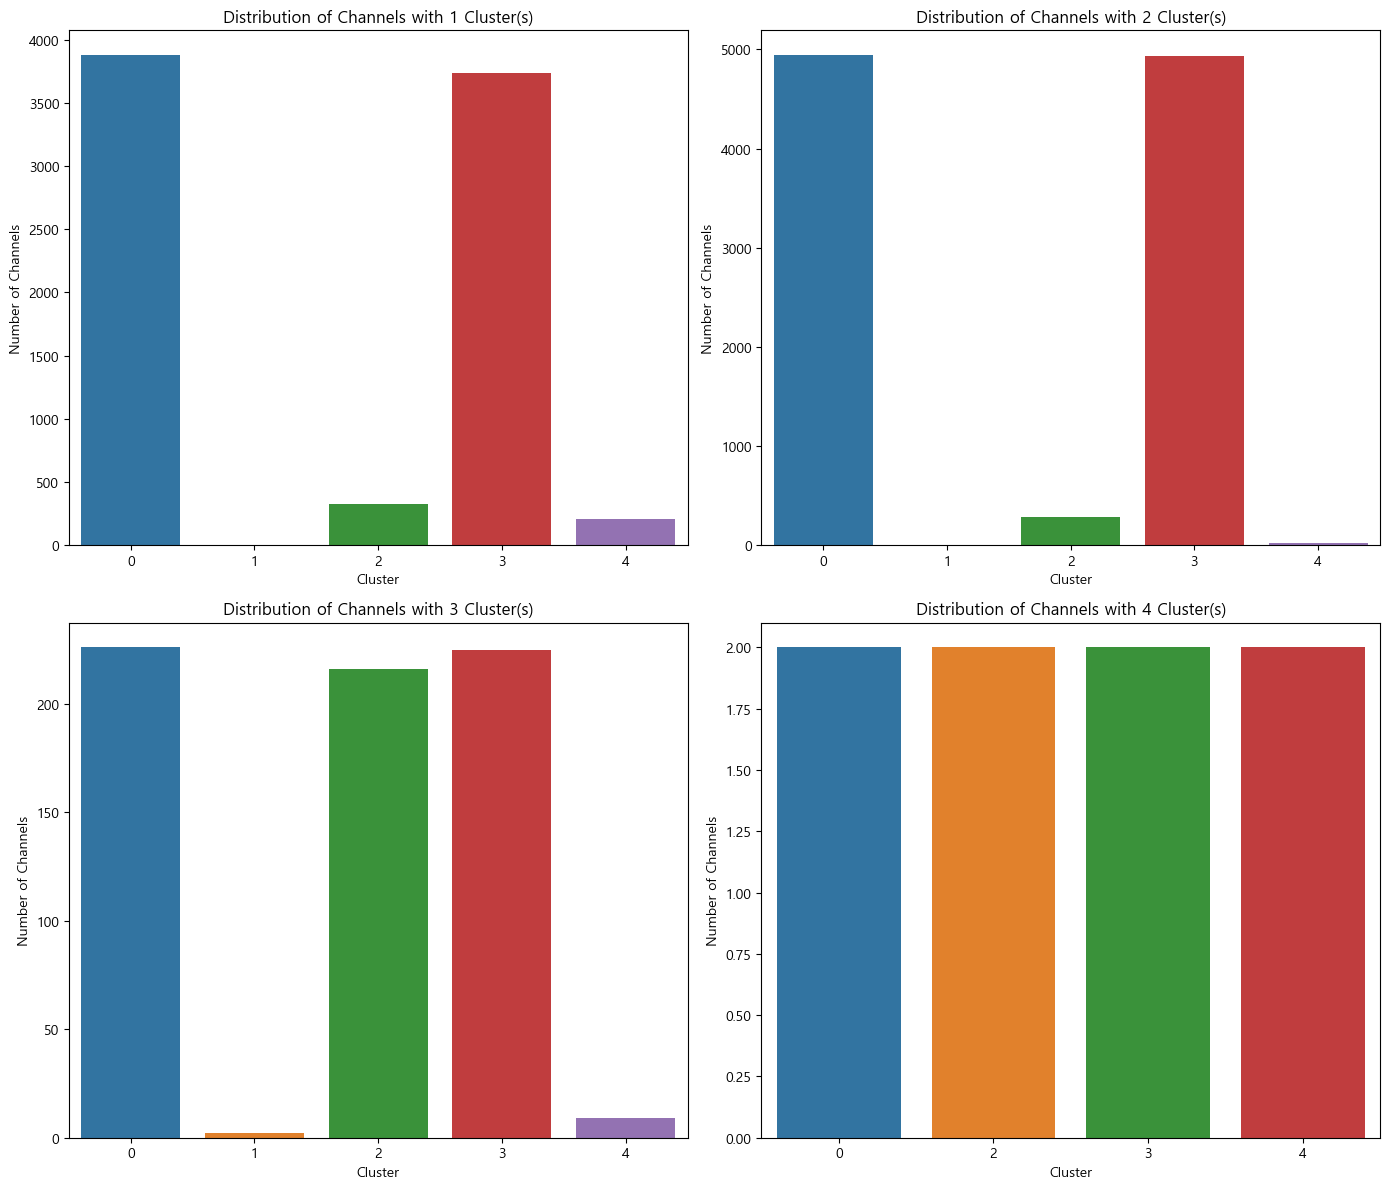

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# cluster 별 채널 분포를 나타내는 함수
def plot_cluster_distribution(cluster_count, ax):
    # 클러스터 개수가 cluster_count인 채널 선택
    selected_channels = channel_clusters[channel_clusters == cluster_count]

    # 해당 채널의 cluster 값을 가져옴
    selected_channels_df = df[df['channel_id'].isin(selected_channels.index)][['channel_id', 'cluster']]

    # 중복 제거
    selected_channels_df = selected_channels_df.drop_duplicates()

    # 시각화
    sns.countplot(data=selected_channels_df, x='cluster', ax=ax)
    ax.set_title(f'Distribution of Channels with {cluster_count} Cluster(s)')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Number of Channels')

# 각 subplot에 대해 함수 실행
for idx, ax in enumerate(axs.ravel()):
    plot_cluster_distribution(idx+1, ax)

plt.tight_layout()
plt.show()


In [199]:
# channel_id에 따라 그룹화한 후, 각 그룹에 있는 고유한 클러스터의 개수를 계산
channel_clusters = df.groupby('channel_id')['cluster'].nunique()

# 하나 이상의 클러스터에 속하는 채널 확인
multi_cluster_channels = channel_clusters[channel_clusters > 1]

print("하나 이상의 클러스터에 속하는 채널의 수: ", len(multi_cluster_channels))

print("고유한 채널의 수: ", df.channel_id.nunique())

하나 이상의 클러스터에 속하는 채널의 수:  5322
고유한 채널의 수:  13474


### 클러스터 별 최신 영상 분포

   cluster  recent_video
0        1          0.00
1        3          0.03
2        4          0.09
3        5          0.09


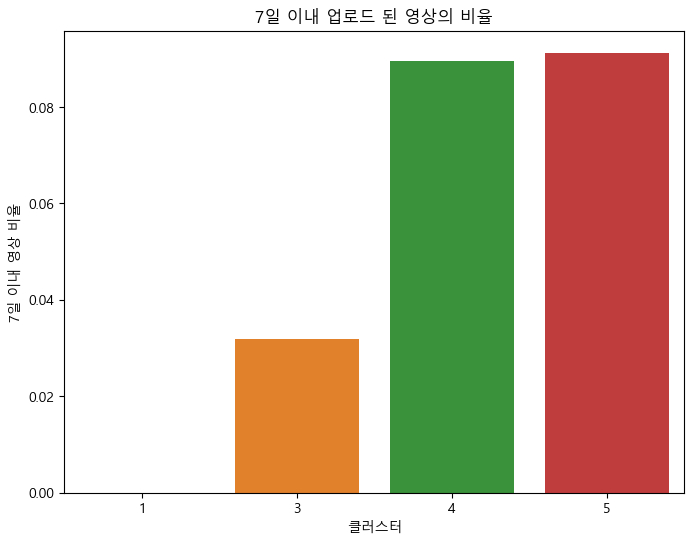

In [200]:
# 최신 영상 정의 (예: 최근 한 달 이내 업로드)
df['recent_video'] = df['date_from_recent'].apply(lambda x: 1 if x <= 7 else 0)

# 클러스터별 최신 영상 비율 계산
recent_video_ratio = df.groupby('cluster')['recent_video'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(data=recent_video_ratio, x='cluster', y='recent_video')
print(recent_video_ratio)
plt.title('7일 이내 업로드 된 영상의 비율')
plt.xlabel('클러스터')
plt.ylabel('7일 이내 영상 비율')
plt.show()

In [201]:
df.columns

Index(['views', 'likes', 'ads_yn', 'duration_seconds', 'subscribers',
       'totalViews', 'ch_avg_views', 'genre_weight', 'date_from_recent',
       'date_from_recent_week', 'cluster', 'video_url', 'title', 'channel_id',
       'genre', 'shorts_yn', 'views_per_sub', 'recent_video'],
      dtype='object')

---

# Text Mining

## 클러스터 별 영상 제목 Word Cloud

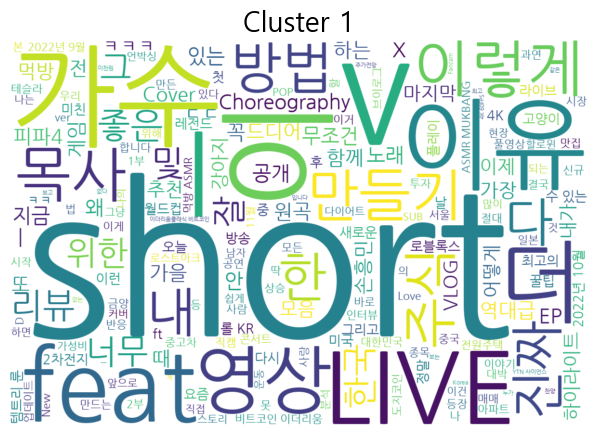

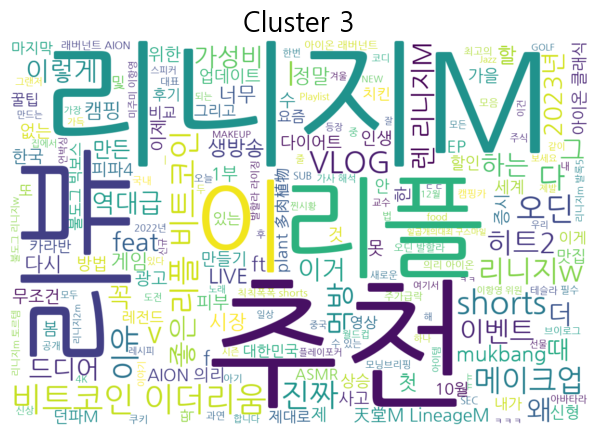

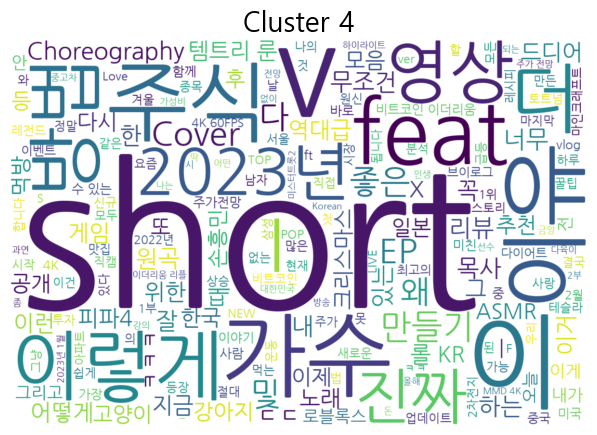

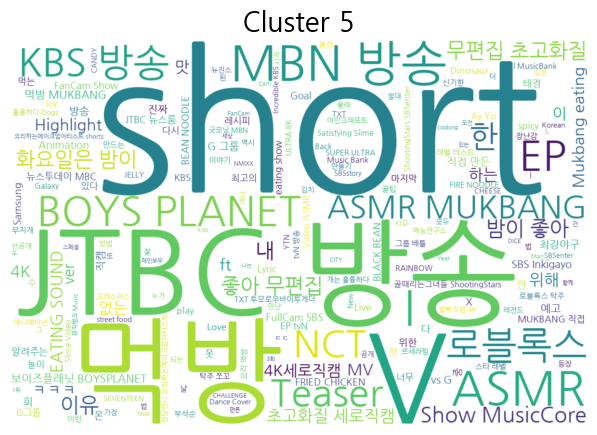

In [191]:

plt.rc('font', family='Malgun Gothic')
# 클러스터별 워드 클라우드
for i in sorted(df['cluster'].unique()):
    # 해당 클러스터의 데이터만 선택
    cluster_data = df[df['cluster'] == i]

    # 'title' 열의 모든 텍스트를 하나의 문자열로 합침
    text = ' '.join(cluster_data['title'])

    # 워드 클라우드 생성
    wordcloud = WordCloud(width=1200, height=800, background_color='white', font_path='NanumGothic').generate(text)

    # 워드 클라우드 그리기
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i}', fontsize=20)
    plt.show()


In [187]:
df['cluster'].nunique()

4

In [193]:
!pip install konlpy

     ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/19.4 MB 1.4 MB/s eta 0:00:15
     ---------------------------------------- 0.1/19.4 MB 1.4 MB/s eta 0:00:14
     ---------------------------------------- 0.2/19.4 MB 1.8 MB/s eta 0:00:11
      --------------------------------------- 0.5/19.4 MB 2.6 MB/s eta 0:00:08
     - -------------------------------------- 0.6/19.4 MB 2.8 MB/s eta 0:00:07
     - -------------------------------------- 0.8/19.4 MB 2.9 MB/s eta 0:00:07
     - -------------------------------------- 0.9/19.4 MB 3.1 MB/s eta 0:00:07
     -- ------------------------------------- 1.0/19.4 MB 2.9 MB/s eta 0:00:07
     -- ------------------------------------- 1.2/19.4 MB 3.0 MB/s eta 0:00:07
     --- ------------------------------------ 1.5/19.4 MB 3.3 MB/s eta 0:00:06
     --- ------------------------------------ 1.6/19.4 MB 3.2 MB/s eta 0:00:06
     --- ------------------------------------ 1.8/19.4 MB 3

In [197]:
from collections import Counter
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from collections import Counter

# 불용어 리스트
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다', '...', '..']

okt = Okt()

for i in sorted(df['cluster'].unique()):
    # 해당 클러스터의 데이터만 선택
    cluster_data = df[df['cluster'] == i]

    # 'title' 열의 모든 텍스트를 하나의 문자열로 합침
    text = ' '.join(cluster_data['title'])
    
    # 텍스트 클렌징(특수문자 제거)
    text = re.sub('[^가-힣a-zA-Z0-9 ]', '', text)
    
    # 형태소 분석
    tokenized_data = okt.morphs(text)
    
    # 불용어 제거
    tokenized_data = [word for word in tokenized_data if word not in stopwords]

    # 각 단어의 빈도 계산
    counter = Counter(tokenized_data)

    # 가장 빈도가 높은 10개 단어 선택
    top_10 = counter.most_common(30)

    # 단어와 빈도로 분리
    words, frequencies = zip(*top_10)

    # 바 차트 그리기
    plt.figure(figsize=(10, 5))
    plt.bar(words, frequencies)
    plt.title(f'Cluster {i}', fontsize=20)
    plt.xticks(rotation=45)
    plt.show()


JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.